# Star Wars Survey

While waiting for *[Star Wars: The Force Awakens](https://en.wikipedia.org/wiki/Star_Wars:_The_Force_Awakens)* to come out, the team at [FiveThirtyEight](https://fivethirtyeight.com/) became interested in answering some questions about *Star Wars fans*. In particular, they wondered: **does the rest of America realise that “The Empire Strikes Back” is clearly the best of the bunch?**

The team needed to collect data addressing this question. To do this, they surveyed *Star Wars fans* using the online tool *SurveyMonkey*. They received 835 total responses, which you download from [their GitHub repository.](https://github.com/fivethirtyeight/data/tree/master/star-wars-survey)

For this project, we'll be cleaning and exploring this dataset.

## Overview

In [1]:
# Read in the data
import pandas as pd
star_wars = pd.read_csv('star_wars.csv', encoding='ISO-8859-1')

# Quick exploration of the data
pd.options.display.max_columns = 100 # to avoid truncated output
star_wars.head(10)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,"Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.",Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,3292879998,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3.0,2.0,1.0,4.0,5.0,6.0,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Unfamiliar (N/A),Unfamiliar (N/A),Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
1,3292879538,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
2,3292765271,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1.0,2.0,3.0,4.0,5.0,6.0,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
3,3292763116,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5.0,6.0,1.0,2.0,4.0,3.0,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Somewhat favorably,Very favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
4,3292731220,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5.0,4.0,6.0,2.0,1.0,3.0,Very favorably,Somewhat favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very unfavorably,Somewhat favorably,Neither favorably nor unfavorably (neutral),Very favorably,Somewhat favorably,Somewhat favorably,Very unfavorably,Somewhat favorably,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3292719380,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,1.0,4.0,3.0,6.0,5.0,2.0,Very favorably,Very favorably,Very favorably,

In [2]:
star_wars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1186 entries, 0 to 1185
Data columns (total 38 columns):
 #   Column                                                                                                                                         Non-Null Count  Dtype  
---  ------                                                                                                                                         --------------  -----  
 0   RespondentID                                                                                                                                   1186 non-null   int64  
 1   Have you seen any of the 6 films in the Star Wars franchise?                                                                                   1186 non-null   object 
 2   Do you consider yourself to be a fan of the Star Wars film franchise?                                                                          836 non-null    object 
 3   Which of the following Star 

In [3]:
star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

## Cleaning and Mapping Yes/No Columns

Take a look at the two columns below:

- `Have you seen any of the 6 films in the Star Wars franchise?`


- `Do you consider yourself to be a fan of the Star Wars film franchise?`


Both columns are currently string types representing `Yes/No` questions. They can also be `NaN` where a respondent chooses not to answer a question. We can make the data a bit easier to analyse down the road by converting each column to a Boolean having only the values `True`, `False`, and `NaN`. 

Let's convert both columns to the Boolean type.

In [4]:
# Check the unique values for the column
# 'Have you seen any of the 6 films in the Star Wars franchise?'
star_wars['Have you seen any of the 6 films in the Star Wars franchise?'
         ].value_counts(dropna=False)

Yes    936
No     250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64

In [5]:
# Check the unique values for the column
# 'Do you consider yourself to be a fan of the Star Wars film franchise?'
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'
         ].value_counts(dropna=False)

Yes    552
NaN    350
No     284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64

In [6]:
# Convert the values in the columns to be either True, False, or NaN

yes_no = {'Yes': True, 'No': False}

columns = ['Have you seen any of the 6 films in the Star Wars franchise?',
        'Do you consider yourself to be a fan of the Star Wars film franchise?']

for col in columns:
    star_wars[col] = star_wars[col].map(yes_no)

In [7]:
# Check that the column values were correctly updated
star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,"Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.",Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,3292879998,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3.0,2.0,1.0,4.0,5.0,6.0,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Unfamiliar (N/A),Unfamiliar (N/A),Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
1,3292879538,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
2,3292765271,True,False,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1.0,2.0,3.0,4.0,5.0,6.0,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
3,3292763116,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5.0,6.0,1.0,2.0,4.0,3.0,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Somewhat favorably,Very favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
4,3292731220,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5.0,4.0,6.0,2.0,1.0,3.0,Very favorably,Somewhat favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very unfavorably,Somewhat favorably,Neither favorably nor unfavorably (neutral),Very favorably,Somewhat favorably,Somewhat favorably,Very unfavorably,Somewhat favorably,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


## Cleaning and Mapping Checkbox Columns

The six columns below represent a single checkbox for the question: **Which of the following Star Wars films have you seen? Please select all that apply.**


- `Which of the following Star Wars films have you seen? Please select all that apply.` - Whether or not the respondent saw `Star Wars: Episode I The Phantom Menace.`


- `Unnamed: 4` - Whether or not the respondent saw `Star Wars: Episode II Attack of the Clones`.


- `Unnamed: 5` - Whether or not the respondent saw `Star Wars: Episode III Revenge of the Sith`.


- `Unnamed: 6` - Whether or not the respondent saw `Star Wars: Episode IV A New Hope`.


- `Unnamed: 7` - Whether or not the respondent saw `Star Wars: Episode V The Empire Strikes Back`.


- `Unnamed: 8` - Whether or not the respondent saw `Star Wars: Episode VI Return of the Jedi`.


For each of these columns, if the value in a cell is the name of the movie, that means the respondent saw the movie. If the value is `NaN`, the respondent either didn't answer or didn't see the movie. We'll assume that they didn't see the movie.

We'll convert each of these columns to a Boolean, then rename the column to something more intuitive.

In [8]:
import numpy as np

# Convert the values in the columns to be either True or False

movie_mapping = {'Star Wars: Episode I  The Phantom Menace': True,
                'Star Wars: Episode II  Attack of the Clones': True,
                'Star Wars: Episode III  Revenge of the Sith': True,
                'Star Wars: Episode IV  A New Hope': True,
                'Star Wars: Episode V The Empire Strikes Back': True,
                'Star Wars: Episode VI Return of the Jedi': True,
                np.nan: False}

for col in star_wars.columns[3:9]:
    star_wars[col] = star_wars[col].map(movie_mapping)

In [9]:
# Rename the columns
star_wars = star_wars.rename(columns={'Which of the following Star Wars films have you seen? Please select all that apply.': 'seen_1',
 'Unnamed: 4': 'seen_2',
 'Unnamed: 5': 'seen_3',
 'Unnamed: 6': 'seen_4',
 'Unnamed: 7': 'seen_5',
 'Unnamed: 8': 'seen_6'})


# Check that the column names and values were correctly updated
star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,"Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.",Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,3292879998,True,True,True,True,True,True,True,True,3.0,2.0,1.0,4.0,5.0,6.0,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Unfamiliar (N/A),Unfamiliar (N/A),Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
1,3292879538,False,NaN,False,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
2,3292765271,True,False,True,True,True,False,False,False,1.0,2.0,3.0,4.0,5.0,6.0,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
3,3292763116,True,True,True,True,True,True,True,True,5.0,6.0,1.0,2.0,4.0,3.0,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Somewhat favorably,Very favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
4,3292731220,True,True,True,True,True,True,True,True,5.0,4.0,6.0,2.0,1.0,3.0,Very favorably,Somewhat favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very unfavorably,Somewhat favorably,Neither favorably nor unfavorably (neutral),Very favorably,Somewhat favorably,Somewhat favorably,Very unfavorably,Somewhat favorably,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


## Cleaning the Ranking Columns

The next six columns ask the respondent to rank the *Star Wars* movies in order of least favourite to most favourite. `1` means the film was the most favourite, and `6` means it was the least favourite. Each of the following columns can contain the value `1`, `2`, `3`, `4`, `5`, `6`, or `NaN`.


- `Please rank the Star Wars films in order of preference with 1 being your favourite film in the franchise and 6 being your least favourite film.` - How much the respondent liked `Star Wars: Episode I The Phantom Menace`


- `Unnamed: 10` - How much the respondent liked `Star Wars: Episode II Attack of the Clones`


- `Unnamed: 11` - How much the respondent liked `Star Wars: Episode III Revenge of the Sith`


- `Unnamed: 12` - How much the respondent liked `Star Wars: Episode IV A New Hope`


- `Unnamed: 13` - How much the respondent liked `Star Wars: Episode V The Empire Strikes Back`


- `Unnamed: 14` - How much the respondent liked `Star Wars: Episode VI Return of the Jedi`


We'll convert each column to a numeric type, then rename the columns so that we can tell what they represent more easily.

In [10]:
# Convert the columns to a float type
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)


# Rename the columns
star_wars = star_wars.rename(columns={'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.': 'ranking_1',
 'Unnamed: 10': 'ranking_2',
 'Unnamed: 11': 'ranking_3',
 'Unnamed: 12': 'ranking_4',
 'Unnamed: 13': 'ranking_5',
 'Unnamed: 14': 'ranking_6'})


# Check that the column names were correctly updated
star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,ranking_1,ranking_2,ranking_3,ranking_4,ranking_5,ranking_6,"Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.",Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,3292879998,True,True,True,True,True,True,True,True,3.0,2.0,1.0,4.0,5.0,6.0,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Unfamiliar (N/A),Unfamiliar (N/A),Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
1,3292879538,False,NaN,False,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
2,3292765271,True,False,True,True,True,False,False,False,1.0,2.0,3.0,4.0,5.0,6.0,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
3,3292763116,True,True,True,True,True,True,True,True,5.0,6.0,1.0,2.0,4.0,3.0,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Somewhat favorably,Very favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
4,3292731220,True,True,True,True,True,True,True,True,5.0,4.0,6.0,2.0,1.0,3.0,Very favorably,Somewhat favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very unfavorably,Somewhat favorably,Neither favorably nor unfavorably (neutral),Very favorably,Somewhat favorably,Somewhat favorably,Very unfavorably,Somewhat favorably,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


## Finding the Highest-Ranked Movie

Now that we've cleaned up the ranking columns, let's find the highest-ranked movie.

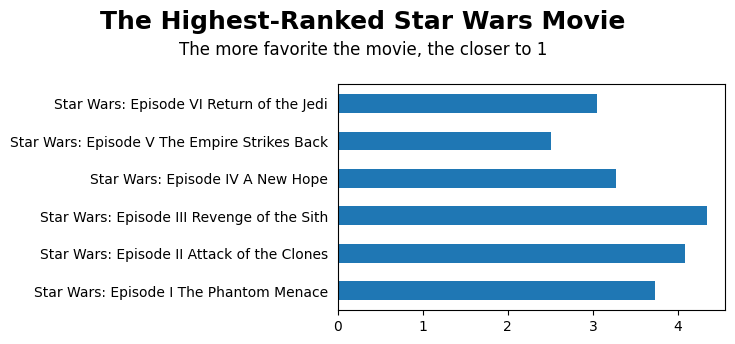

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

movie_titles = ['Star Wars: Episode I The Phantom Menace',
'Star Wars: Episode II Attack of the Clones',
'Star Wars: Episode III Revenge of the Sith',
'Star Wars: Episode IV A New Hope',
'Star Wars: Episode V The Empire Strikes Back',
'Star Wars: Episode VI Return of the Jedi']

# Adding the bar plot and setting ticks appearance
fig, ax = plt.subplots(figsize=(5,3))
ax.barh(y=movie_titles, width=star_wars.iloc[:, 9:15].mean(), height=0.5)
ax.tick_params(left=False)

# Adding a title and a subtitle
ax.text(x=-2.8, y=7, s='The Highest-Ranked Star Wars Movie', size=18, weight='bold')
ax.text(x=-1.87, y=6.3, s= 'The more favorite the movie, the closer to 1', size=12)

plt.show()

So far, we've cleaned up the data, renamed several columns, and computed the average ranking of each movie.

It looks like the original trilogy (Episodes IV, V and VI) is better ranked than the prequel trilogy (Episodes I, II and III). A few possible reasons for this could be the fact of the second trilogy doesn't follow the original story accurately and the introduction of new characters that brings more changes to the original movies.

## Finding the Most Viewed Movie

In [12]:
star_wars.iloc[:, 3:9].sum()

seen_1    673
seen_2    571
seen_3    550
seen_4    607
seen_5    758
seen_6    738
dtype: int64

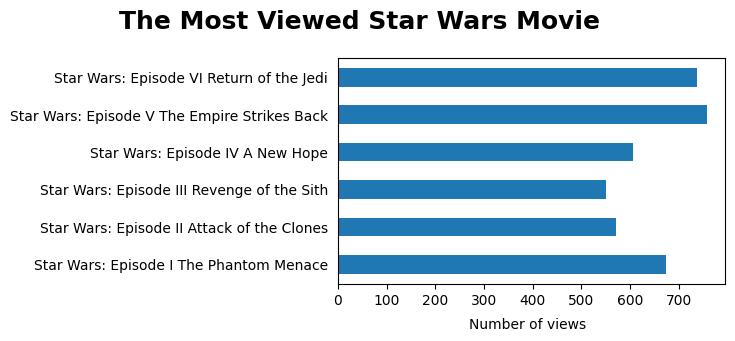

In [13]:
# Adding the bar plot and setting ticks appearance
fig, ax = plt.subplots(figsize=(5,3))
ax.barh(y=movie_titles, width=star_wars.iloc[:, 3:9].sum(), height=0.5)
ax.tick_params(left=False)

# Adding a title and a label
ax.text(x=-450, y=6.3, s='The Most Viewed Star Wars Movie', size=18, weight='bold')
ax.text(x=270, y=-1.7, s='Number of views')

plt.show()

It seems that the original trilogy was watched by more respondents than the prequel trilogy. This reinforces what we saw in the rankings, where the first released movies appear to be more popular.

## Exploring the Data by Binary Segments

We know which movies the survey population as a whole has ranked the highest. Now let's compute the most viewed and the highest-ranked movie by gender, and then compare the results.

In [14]:
males = star_wars[star_wars['Gender'] == 'Male']
females = star_wars[star_wars['Gender'] == 'Female']

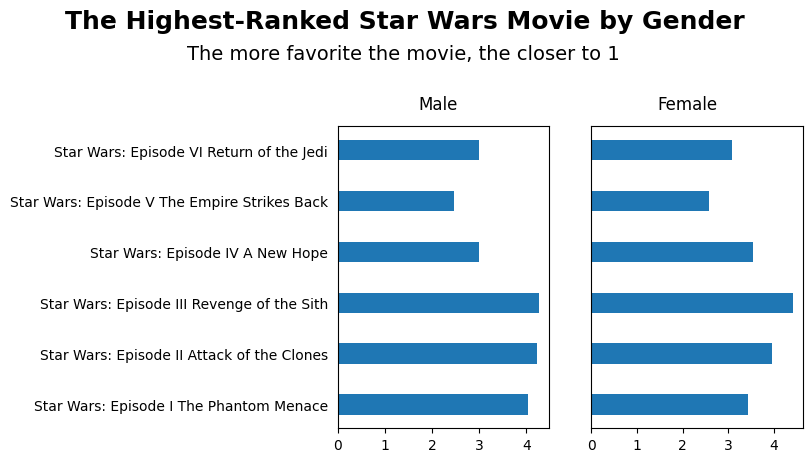

In [15]:
# Adding the subplots
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharey=True)

# Adding the bar plots
ax1.barh(y=movie_titles, width=males.iloc[:, 9:15].mean(), height=0.4)
ax2.barh(y=movie_titles, width=females.iloc[:, 9:15].mean(), height=0.4)

# Setting ticks appearance
ax1.tick_params(left=False)
ax2.tick_params(left=False)

# Adding a title and subtitles
ax1.text(x=-5.8, y=7.4, s='The Highest-Ranked Star Wars Movie by Gender', size=18, weight='bold')
ax1.text(x=-3.2, y=6.8, s= 'The more favorite the movie, the closer to 1', size=14)
ax1.text(x=1.7, y=5.8, s='Male', size=12)
ax2.text(x=1.45, y=5.8, s='Female', size=12)

plt.show()

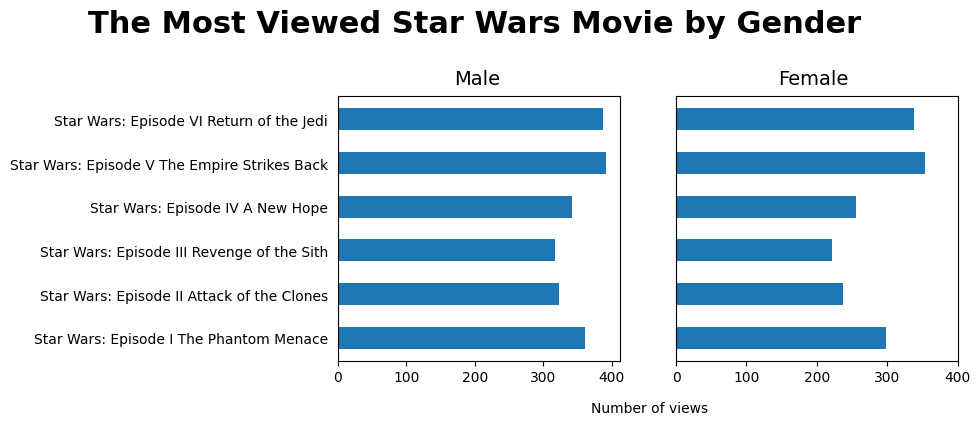

In [16]:
# Adding the subplots
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(8, 3.5))

# Adding the bar plots
ax1.barh(y=movie_titles, width=males.iloc[:, 3:9].sum(), height=0.5)
ax2.barh(y=movie_titles, width=females.iloc[:, 3:9].sum(), height=0.5)

# Setting ticks appearance and location
ax1.tick_params(left=False)
ax2.tick_params(left=False)
ax2.set_xticks([0, 100, 200, 300, 400])

# Adding a title, subtitles and label
ax1.text(x=-365, y=7, s='The Most Viewed Star Wars Movie by Gender', size=22, weight='bold')
ax1.text(x=170, y=5.8, s='Male', size=14)
ax1.text(x=370, y=-1.7, s='Number of views', size=10)
ax2.text(x=145, y=5.8, s='Female', size=14)

plt.show()

Curiously, more males watched the prequel trilogy, but they liked them far less than females did.


## Conclusion

In this project, we managed to find the highest ranked and the most viewed Star Wars movies.

According to our findings, **"The Empire Strikes Back"** is the most seen and liked Star Wars movie by the respondents.